--- 
Project for the course in Computational Statistics | Summer 2020, M.Sc. Economics, Bonn University | [Manuel Huth](https://github.com/manuhuth)

# Analysis of the Variance of the Principal Component Regression Coefficients and the Estimated Outcome <a class="tocSkip">  
### Does Knowing the True Variance Covariance Matrix Decrease the Variance?
---

The following notebook contains my analysis of the variance of the principal component regression coefficients and the estimated outcome when the true correlation matrix is known and when it is unknown. The full project can be found on [GitHub](https://github.com/manuhuth/PCR-Parameter-Variance-Analysis). This Notebook focusses mainly on the simulation study. A more theoretical approach addressing the data generating process and the theory behind the simulation study can be found in the PDF located in the repository [PDF](https://github.com/manuhuth/PCR-Parameter-Variance-Analysis/blob/master/Analysis%20of%20the%20Variance%20of%20the%20Principal%20Component%20Regression%20Coefficients%20and%20the%20Estimated%20Outcome.pdf).  

#### Downloading and viewing this notebook

* The ensure that every image or format is displayed properly, I recommend to download this notebook from its repository on [GitHub](https://github.com/manuhuth/PCR-Parameter-Variance-Analysis). Other viewing options like _MyBinder_ or _NBViewer_ might have issues to display formulas and formatting.


#### Information about the Set up
- The data generating process of this notebook is set up and parameterized using a system of equations. To ease readability, since using the math environment in an extensive manner slows down the speed of the notebook significantly, and since this notebook focuses on the simulation study, I did not include the full derivation of the data generating process. Interested readers can find it in the corresponding [paper](https://github.com/manuhuth/PCR-Parameter-Variance-Analysis/blob/master/PDF.pdf) that focuses more on the theoretical properties. For the same reasoning I only state the theorems used to derive a justifiable simulation. For their proofs it is also referred to the [paper](https://github.com/manuhuth/PCR-Parameter-Variance-Analysis/blob/master/PDF.pdf) 

- The notebook is designed to allow users to modify the simulation study by their own taste. To do so the [folder](https://github.com/manuhuth/PCR-Parameter-Variance-Analysis) from GitHub must be forked and the working directory in the first cell of code (below the table of contents) must be set to the location of the folder. (*setwd('locationOfFolder')*)
- Additionally to the files used in here (principal component analysis/regression, functions to deal with discrete random variables, the data generating function and wrapper functions to use the apply family inside the notebook), the folder on GitHub containing the [R-files](https://github.com/manuhuth/PCR-Parameter-Variance-Analysis/tree/master/R) contains more functions than used in this notebook. They offer easy implementation of predictions or cross validation, which might be a desirable feature for some users.

- To allow for a fast implementation, I have uploaded presimulated data. If the user wants to implement an own simulation study, I recommend to decrease the population size (currently 230,000) and the number/size of drawn samples (section 4.2, first cell) for the simulation study. Using the current set-up, the latter took around 20 hours on an Intel Xeon Core 6 CPU @ 2.50 GHz with a 64 bit Windows 10 operating system and 64 Gb of RAM.

<h1>Table of Contents<span class="tocSkip"></span></h1>

<li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1">1. Introduction</a></span><ul class="toc-item"></li>
<li><span><a href="#2.-Data-Generating-Process" data-toc-modified-id="2.-Data-Generating-Process-2">2. Data Generating Process</a></span><ul class="toc-item"></li>
    
<li><span><a href="#3.-Principal-Component-Methodology" data-toc-modified-id="3.-Principal-Component-Methodology-3">3. Principal Component Methodology'</a></span><ul class="toc-item">
<li><span><a href="#3.1-Principal-Component-Analysis" data-toc-modified-id="3.1-Principal-Component-Analysis">3.1 Principal Component Analysis</a></span>
<li><span><a href="#3.2-Principal-Component-Regression" data-toc-modified-id="3.2-Principal-Component-Regression">3.2 Principal Component Regression</a></span>
<li><span><a href="#3.3-Estimate-the-Variance-of-the-Coefficients-in-a-Simulation Study" data-toc-modified-id="3.3-Estimate-the-Variance-of-the-Coefficients-in-a-Simulation Study
">3.3 Estimate the Variance of the Coefficients in a Simulation Study
</a></span><ul class="toc-item">
<li><span><a href="#3.3.1-Framework-to-Use-Simulated-Distributions-of-the-Coefficients-to-Estimate
-the-Coefficients'-Variances-in-a-Simulation-Study" data-toc-modified-id="3.3.1-Framework-to-Use-Simulated-Distributions-of-the-Coefficients-to-Estimate
-the-Coefficients'-Variances-in-a-Simulation-Study">3.3.1 Framework to Use Simulated Distributions of the Coefficients to Estimate
the Coefficients’ Variances in a Simulation Study</a></span></li>
<li><span><a href="#3.3.2-Framewor-to-Use-Formula-the-Algebraically-Derived-Formulas-to-Estimate
-the-Coefficients'-Variance-in-a-Simulation-Study" data-toc-modified-id="3.3.2-Framewor-to-Use-Formula-the-Algebraically-Derived-Formulas-to-Estimate
-the-Coefficients'-Variance-in-a-Simulation-Study">3.3.2 Framework to Use Formula the Algebraically Derived Formulas to Estimate
the Coefficients' Variance in a Simulation Study</a></span></li></li></li> 
    
<li><span><a href="#4.-Simulation" data-toc-modified-id="4.-PSimulation-4">4. Simulation</a></span><ul class="toc-item">
<li><span><a href="#4.1.Simulate the whole Population" data-toc-modified-id="4.Simulate the whole Population">4.1. Simulate the whole Population</a></span>    
<li><span><a href="#4.2 Variance of the Principal Component Regression Coefficients in a Simulation
Study" data-toc-modified-id="4.2 Variance of the Principal Component Regression Coefficients in a Simulation
Study">4.2 Variance of the Principal Component Regression Coefficients in a Simulation
Study</a></span><ul class="toc-item">
<li><span><a href="#4.2.1 Compare the Variances of the Theoretical Case using Simulated Distributions
and the Simulated Algebraically Derived Formula" data-toc-modified-id="4.2.1 Compare the Variances of the Theoretical Case using Simulated Distributions
and the Simulated Algebraically Derived Formula">4.2.1 Compare the Variances of the Theoretical Case using Simulated Distributions
and the Simulated Algebraically Derived Formulay</a></span></li>
<li><span><a href="#4.2.2 Compare the Variances of the Empirical Case using Simulated Distributions
and the Simulated Algebraically Derived Formula" data-toc-modified-id="4.2.2 Compare the Variances of the Empirical Case using Simulated Distributions
and the Simulated Algebraically Derived Formula">4.2.2 Compare the Variances of the Empirical Case using Simulated Distributions
and the Simulated Algebraically Derived Formula</a></span></li>
<li><span><a href="#4.2.3 Compare the Variances of the Empirical and the Theoretical Coefficient
Estimates" data-toc-modified-id="4.2.3 Compare the Variances of the Empirical and the Theoretical Coefficient
Estimates">4.2.3 Compare the Variances of the Empirical and the Theoretical Coefficient
Estimates</a></span></li></li></li> 

<li><span><a href="#5.-Conclusion" data-toc-modified-id="5. Conclusion">5. Conclusion</a></span><ul class="toc-item"></li>
  
    



In [3]:
#load  all packages
#At the end set this on top of the notebook
options(repr.plot.width=8, repr.plot.height=4) #adjust plot size

setwd('') #set your wordking directory to the name of the folder that you forked from GitHub
files <- c('PCA', 'PCR', 'random_discreteVariables', 'DGP_function', 'plot_functions', 'coef_var_analysis', 'OLS_estimate') #define all files with functions to read from the foldr 'R'
for (i in 1:length(files)) { #loop to read all files
  source(paste('R/', files[i], '.R', sep = ''))
}

require(tidyr) #easy implementation of histograms of columns
require(readxl) #Only necessary if own data is simulated
require(ggplot2) #plotting library
require(gridExtra) #extension to ggplot2
require(dagitty) #causal graph
require(matrixStats) #additional functions

# 1. Introduction
---
In economics, one is often interested in structural modelling which abstracts real world dependencies in a realistic theoretical set-up. For example Blundell et al. [(2016)]((https://onlinelibrary.wiley.com/doi/abs/10.3982/ECTA11576?casa_token=T7_8JfSc3V0AAAAA:Rq3dQoE4CwRQ5bmOvmvwz1RfUnzp7wYh3LRtrMZsrJjKhrefbBItL0gdFcdZLiYVB-33AUya90S8wTfy) examine how female labour supply and human capital accumulation are affected by tax credit reforms. Fan et al. [(2015)](https://www.ssc.wisc.edu/~aseshadr/WorkingPapers/FST.pdf) study, inter alia, the dependencies of schooling and wages. In the latter paper, the authors estimate a key reduced form equation that is similar to the original Mincer Equation (Mincer, [1974](https://eric.ed.gov/?id=ED103621)), which has been examined extensively in the economic literature, see Heckman et al. [(2006)](https://www.sciencedirect.com/science/article/pii/S1574069206010075) for a more recent review. Depending on the chosen covariates, models estimating wages have to deal with highly multicollinear data, and thus high variances of OLS coefficients, leading to high variances of the outcome estimates. For the outcome estimate it is desirable to have a low variance yielding a reliable estimate of the counterfactual outcome. Reducing the variance can be addressed applying principal components, that builds up on computing orthogonal projections of the original data such that the variance of the original data is inherited in the projections (James et al., [2013](https://link.springer.com/book/10.1007%2F978-1-4614-7138-7)). Subsequent, an OLS regression is performed using the chosen projections. Since the projections are uncorrelated the issue of high multicollinearity is solved. The projection matrix consists of eigenvectors of the Variance covariance matrix and is therefore unique up to a sign flip of the projections (Jollife, [1986](https://link.springer.com/chapter/10.1007/978-1-4757-1904-8_8)). In practice this variance covariance matrix is unknown and must be estimated using the given sample and thus the projection matrix is also an estimate. 

In this paper I examine if the estimation of the projection matrix increases the variance of the regression coefficients and thus the variance of the estimated outcome relative to the variances obtained by using the true projection matrix. I do so by simulating data for an equation in style of the Mincer Equation, that sets wages in dependence to highly correlated covariates and should approximate realistic data. Subsequent I derive that simulating the distribution of the principal component regression coefficients is, due to the non-uniqueness of the projection matrix in the case of the estimated projection, not suitable to derive the unconditional variance of the estimated coefficients. I present another simulation strategy, to obtain proper variances of the estimates, that builds up on some algebra, and justify this strategy by comparing both cases using the true projection matrix. Finally, I compare the variances of the coefficients of the true and of the estimated projection matrices and find that there is no substantial difference. Furthermore, I validate that this leads to no difference in the variance of the estimated outcome.
    
The structure of the paper is the following. In section 2 I introduce how the data is build to yield the desirable features of the analysis. Subsequent, I show in section 3 how the principal components can be derived, how the principal component regression is applied and discuss two techniques to derive the variance of the estimators using a simulation study. In section 4, the simulation study, I simulate the data using the data generating process proposed in section 2, compare the two techniques to derive the variance of the estimates and finally compare the variances of the coefficient estimates and the outcome estimates using the proper technique. Section 5 concludes and proposes extensions for further analysis. 

# 2. Data Generating Process
---
To model the real hourly wages of an individual $i$ I follow the well-known Mincer Equation (Mincer, [1974](https://eric.ed.gov/?id=ED103621)), that models the logarithmic wage as linear function of schooling and work experience as a second order polynomial. Additionally, I add the number of siblings and the years of parent's education and interpret the individual intercept coefficient as a persons ability. I follow Björklund and Kjellström [(2002)](https://www.sciencedirect.com/science/article/abs/pii/S0272775701000036) and divide the squared work experience by 100 to have more numerical stability. The notation is the following
$Y_i:=$ log-hourly wage of individual i, $\alpha:=$ constant term for all individuals, $a_i:=$ individual's ability, $s_i :=$ individual's years of schooling, $w_i := $ individual's work experience, $n_i:= $ number of Siblings, $e_i:= $ parent's years of education, $\varepsilon_i:= $ normally distributed error and uncorrelated with the other variables and $T_{i,g,c}:= $ individual's test score in grade $g$ of subject $c$. 
\begin{align}
\ln (Y_i) = \alpha + a_i + \beta_1 s_i  + \beta_2 w_i + \beta_3 \frac{w_i^2}{100} + \beta_4 n_i + \beta_5 e_i + \varepsilon_i
\tag{2.1}
\label{eq:wages}
\end{align}
Since ability is not observable in the real world, I use math and reading test scores from the seventh and eleventh grade as a proxy variable in the analysis. I have chosen this type of model since it is well-known and well-analyzed (see inter alia: Heckman et al. [(2006)](https://www.sciencedirect.com/science/article/pii/S1574069206010075); Lemieux [(2006)](https://link.springer.com/chapter/10.1007/0-387-29175-X_11)) and all the covariates are (highly) correlated. Thus it provides a well-fitting set-up to examine the question whether the variance of the parameter estimates and the outcome estimates increases, if the true variance covariance matrix of the regressors is unknown in principal component regression. For the sake of this principal component analysis, I have omitted regional or gender specific dummy variables. However, it would be interesting to incorporate them in further analysis. Setting up the data generating Process, I faced three main issues 

   1. there should be a reasonable correlation structure between the variables
   2. there should not be impossible values, e.g. negative count variables
   3. benchmark population moments from Blundell et al. [(2005)](https://rss.onlinelibrary.wiley.com/doi/full/10.1111/j.1467-985X.2004.00360.x?casa_token=8XTSrhMvcoIAAAAA%3Ar0ZECHQIWsbtdynj4kZZ_R_-HSDkUKPlkLvS8GF9whkNF584aPmn6nHGR4cZXOOZTVLQQu_-9E8VunWZ) should be met

My strategy was to first determine the dependencies, determining the respective scaling of all variables and finally determine equations to impose a structure that meets the given population moments and the dependence structure. \
Parent's with high education usually have fewer children (Cygan-Rehm and Maeder, [2013](https://www.sciencedirect.com/science/article/abs/pii/S0927537113000584)), ability influences test scores (Hansen et al., [2004](https://www.sciencedirect.com/science/article/abs/pii/S0304407603002598)) and parents with education tend to have children with more schooling years (Davis-Kean, [2005](https://psycnet.apa.org/buy/2005-06518-016)). A key assumption I make is that ability is random and not affected by any other variable, in particular parent's education. This assumption facilitates the derivation of the parameterization of the model, especially of the number of years of schooling of an individual, and seemed reasonable for the purposes of my data generating process. 

The full reasoning and methods to build the data generating process can be found in the corresponding [paper](https://github.com/manuhuth/PCR-Parameter-Variance-Analysis/blob/master/PDF.pdf) at pp. 22. Since this is not part of the core analysis, to facilitate readability and to increase the compilation speed of the notebook, I have omitted it from the notebook.

**Figure 1 - Causal Graph**

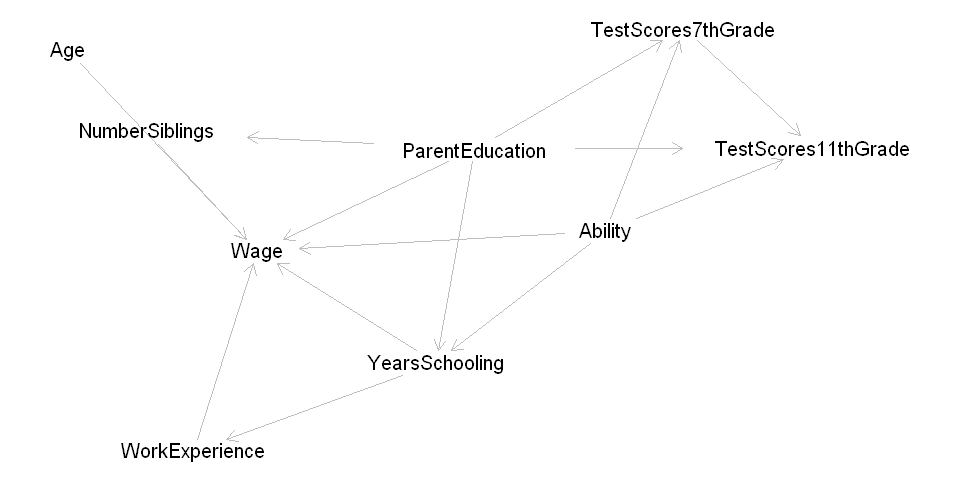

In [8]:
causal_graph <- dagitty("dag {
Ability -> TestScores7thGrade Ability Ability -> TestScores11thGrade Ability -> YearsSchooling Ability -> Wage
TestScores7thGrade -> TestScores11thGrade 
ParentEducation -> TestScores7thGrade ParentEducation -> TestScores11thGrade ParentEducation -> NumberSiblings ParentEducation -> YearsSchooling
YearsSchooling -> WorkExperience YearsSchooling -> Wage
NumberSiblings -> Wage ParentEducation -> Wage
WorkExperience -> Wage
Age -> Wage
}")
plot(graphLayout(causal_graph))

# 3. Principal Component Methodology
---
In this section I show how the principal components can be computed and how the variance of the parameter estimate in the principal component regression can be derived in different ways using a simulation study. 
Let $I = {1, \dots p}$ be an index set, $x_i \in \mathbb{R}^n$ $\forall i \in I$ be a random vector, such that its entries are independent and follow the same distribution $X_i$ that has finite first and second moments. For notation purposes let $X =\begin{pmatrix}
    X_1 & X_2 & \dots & X_p
\end{pmatrix}'$. Note that it would be sufficient to assume that the expected values and variances are equal across entries in $x_i$. However, for ease of notation I decided to stick to the case of equal distributions. Note that this definition yields the same results as defining a matrix containing random vectors from $\mathbb{R}^N, N > n$, that represent every observation from a finite sample population. To stay more general and allow the theoretical results to hold for infinite samples, I stick to the case of general random variables for the theory part. The variance covariance matrix of this random variables is denoted by $\pmb \Sigma$. The collection of the $x_i$'s vectors is defined by the sample matrix 
\begin{align}
\pmb X = \begin{pmatrix} x_1 & x_2 & \dots & x_p \end{pmatrix} \in \mathbb{M}_{n \times p}.
\tag{3.1}
\label{eq:Xmatrix}
\end{align}
It is assumed that the random vector $x_i$ is already demeaned. For ease of notation it is therefore assumed that $\text{E}(X_i) = 0, \ \forall i \in I$. Note that in some applications it might be desirable to use standardized variables with unit variances. However, since the scaling of the variables used in the regression mostly consists of count numbers and thus the same scales, I only normalize the data and thus stick in the methodology section to the case with normalized data.




## 3.1 Principal Component Analysis
---
The aim of the principal component analysis is to build $M$ new vectors $z_1, z_2, \dots, z_M \in \mathbb{R}^n$ as orthogonal linear combinations of $x_1, x_2, \dots, x_p$. Note that $M \leq p$ since otherwise the $z_m$'s cannot be orthogonal to each other. Denoting the scalars that are used to build $z_m$ by $\phi_m \in \mathbb{R}^p$, one can express the $m$-th principal component as $z_m = \pmb X \cdot \phi_m$. By defining $\pmb \phi = \begin{pmatrix} \phi_1 & \phi_2 & \dots & \phi_M \end{pmatrix}$ it is possible to shorten the above notation. This is useful to compute the values for all $z_m$ in one equation.
\begin{align}
\pmb Z = \begin{pmatrix} z_1 & z_2 & \dots & z_M \end{pmatrix} = \begin{pmatrix} \pmb X \cdot \phi_1 & \pmb X \cdot \phi_2 & \dots & \pmb X \cdot \phi_M \end{pmatrix} = \pmb X \pmb \phi.
\label{eq:Z_representation}
\tag{3.2}
\end{align}
It will turn out that $\pmb \phi$ is the matrix containing all eigenvectors with length one of $\pmb \Sigma$ as columns. However, since an eigenvector with length one multiplied by minus one has the the same direction and length, this new vector can also be used as suitable eigenvector. From equation \eqref{eq:Z_representation} it can be observed that flipping the sign of $\phi_m$ changes the sign of $z_m$, which will be relevant to derive that the coefficient estimates are variant to the choice of the sign (Theorem  3).

I follow many textbooks and take $\pmb \phi$ as deterministic (Joliffe, [1986](https://link.springer.com/chapter/10.1007/978-1-4757-1904-8_8); Shlens, [2014](https://www.cs.cmu.edu/~elaw/papers/pca.pdf)). However, in practice it is a matrix to estimate and therefore adds additional randomness turning the matrix $\pmb Z$ stochastic. Subsequent, I use hat notation for the quantities derived in an empirical set-up to distinguish the theoretical and the empirical cases. E.g $\hat{\phi}_m$ are the solutions to the empirical counterpart of \eqref{eq:probPCA}, $\hat{\pmb \phi}$ their collection in a matrix, $\hat{z}_m$ the estimated principal components and $\hat{\pmb Z}$ their collection in a matrix. This two different approaches build the foundations to obtain the estimators of interest in the principal components regression.

Since the derivation of $\pmb \phi$ and $\hat{\pmb \phi}$ is very similar I only show the derivation of the former and briefly state the differences of the latter subsequent. For the derivation, I assume that the eigenvalues are distinct and thus $\Sigma$ is ensured to be diagonalizable, which is the case in most applications. I derive all $p$ possible principal components and therefore use $p$ as highest index. The desired number of them can subsequent be adjusted by choosing the first $M$ vectors with highest corresponding eigenvalues. The problem that has to be solved for all $m \in I$ is found to be
\begin{equation}
\begin{aligned}
\phi_m =\quad & \arg \max_{w \in\mathbb{R}^p} \text{Var}(Z_m) \\
\textrm{s.t.} \quad & Z_m = X w \ \forall m \in I\\
    & \text{Cov}(Z_m, Z_{m'}) = 0 \ \ \text{if }m \neq m' \ \  \forall m, m' \in I\\
  &\text{Var}(Z_m) \geq \text{Var}(Z_{m+1}) \ \forall m \in I_{(-p)}  \\
  & ||w|| = 1
\end{aligned}
\tag{3.3}
\label{eq:probPCA}
\end{equation}

**Theorem 1.** *Let $\lambda_1 > \lambda_2 > \dots > \lambda_p > 0, \lambda_i \in \mathbb{R}$ be eigenvalues of $\pmb \Sigma$ and $v_1, v_2, \dots, v_p \neq 0$ the corresponding eigenvectors with length one. Then $\phi_m = v_m \ \forall m \in I$ is a solution to the problem given in \eqref{eq:probPCA}.* Proof can be found at page 7 on [GitHub](https://github.com/manuhuth/PCR-Parameter-Variance-Analysis/blob/master/PDF.pdf)

**Theorem 2.** *There are $2^p$ solutions of problem \eqref{eq:probPCA} and $2^M$ if $M$ principal components are used.* Proof can be found at page 7 on [GitHub](https://github.com/manuhuth/PCR-Parameter-Variance-Analysis/blob/master/PDF.pdf)

There is no clear theory which eigenvectors should be chosen. In subsection 3.2 I show that the choice affects the regression coefficients but not the estimated outcome. Moreover, I show in section 4 that the non-uniqueness of $\pmb \phi$ restricts the way how the variance of the principal component regression coefficients can be obtained and that if these restrictions are taken into account, the variances of the parameter estimates are invariant to the choice of $\pmb \phi$.
 For notation purposes I will denote the whole class of solutions to the specific principal component analysis problem \eqref{eq:probPCA} as $\left[ \phi \right]$ and any representative of this class by $\pmb \phi$. \
 In an empirical set-up one would replace $\text{Var}(Z_m)$ by its empirical estimate $\frac{1}{N-1}\hat{z}'_m \hat{z}_m$ and the vector of random variables X by the matrix of empirical outcomes $\pmb X$. The solution is found to be the eigenvectors of the estimated variance covariance matrix $\hat{\pmb \Sigma}$. 

## 3.2 Principal Component Regression
---
In this subsection I will show how the estimator of the principal component regression can be derived using principal component analysis. Moreover, I show the differences in the estimates that occur due to using either $\pmb \phi$ or $\hat{\pmb \phi}$. First I assume a linear true relationship of the expected value of $Y$ and $\gamma$
\begin{align}
Y = \pmb X \gamma + \varepsilon,
\label{eq:OLSequation}
\tag{3.4}
\end{align}
whereby $\varepsilon \sim \mathcal{N}\left(\pmb 0, \sigma_x^2 \pmb I_{n \times n} \right)$ is a vector of uncorrelated error terms with conditional mean zero and $\gamma \in \mathbb{R}^p$. \
The idea of principal component regression is that $Y$ can be estimated in a linear model by using the constructed $M$ principal components. The advantage compared to an ordinary OLS model is that often a small number of principal components is sufficient to explain the variability in $X$ and its correlation with $Y$ (Joliffe, [1986](https://link.springer.com/chapter/10.1007/978-1-4757-1904-8_8)). In this paper I focus on the variance of the principal component regression coefficient estimates and the variance of the predicted outcome and therefore always use all principal components. In the next subsection, I show that the respective betas are invariant to the choice of $M$ and thus using all principle components yields more information for the purposes of my study. \
The line of argumentation on the usefulness of principal component regression in the literature, for example in Friedman et al. [(2001)](https://psycnet.apa.org/buy/2005-06518-016) and James et al. [(2013)](https://link.springer.com/book/10.1007%2F978-1-4614-7138-7), is reflected by: Imagine a case where the number of regressors $p$ is close to the number of observations $n$ (a) or a case of very high multicollinearity (b). In such a case the OLS estimate tends to overfit the data (a) or yields high variance of the coefficients and therefore of the estimated outcome (b). The former feature (a) is not part of this paper but combining both issues (a) and (b) in one study would be a desirable extension. Since all principal component are uncorrelated by construction the principal component regression circumvents the problem of high multicollinearity (b). \
This is true if the true variance covariance matrix $\pmb \Sigma$ is known. However, as stated in the previous subsection, in practice $\pmb \Sigma$ is unknown and $\pmb \phi$ is estimated by the eigenvectors of $\hat{\pmb \Sigma}$. So instead of $p$ parameters to estimate, there are $M$ parameters to estimate in the regression and $p$ vectors to estimate before the regression. The latter adds additional randomness to the $M$ estimated parameters and thus also to the estimate of the outcome. Subsequent I derive the necessary tools to set up a simulation study that addresses this issue in section 4.

Quantities denoted with a superscript $t$ are used in the theoretical framework and quantities denoted with a superscript $s$ are computed using the stochastic $\hat{\pmb \phi}$. \
The equations to be estimated are 
\begin{align}
Y = \pmb Z \beta^t + \varepsilon^t_Z = \pmb X \pmb \phi \beta^t + \varepsilon^t_Z, \notag \\
Y =  \hat{\pmb Z} \beta^s + \varepsilon^s_Z = \pmb X \hat{\pmb \phi} \beta^s + \varepsilon^s_Z,
\label{eq:pcrRegression}
\tag{3.5}
\end{align}
whereby $\varepsilon^t_Z$ and $\varepsilon^t_Z$ are again vectors of independent homoscedastic error terms with conditional expectation of zero and $\beta^t,\beta^s  \in \mathbb{R}^{M}$ are the parameter vectors of interest. \\
Since in a simulation study drawing different samples at each iteration $\hat{\pmb \phi}$ is estimated at each iteration, the variance estimate of $\hat{\beta}^s$ simulating the distribution yields a higher variance induced by different $\hat{\beta}^s$ that are obtained using different $\hat{\pmb \phi}$. Since $\pmb \phi$ is chosen prior to the simulation, this problem does not appear for $\hat{\beta}^t$.

**Theorem 3.** $\hat{\beta}^s$ *is variant to the choice of the signs of the eigenvectors in $\hat{\pmb \phi}$.* Proof can be found at page 9 on [GitHub](https://github.com/manuhuth/PCR-Parameter-Variance-Analysis/blob/master/PDF.pdf)

Hence, an alternative way of computing the variance of $\hat{\beta}^s$ in a simulation study must be found. I use some algebra to find a representation that is only dependent on the eigenvalues, which are unique, and not dependent on the eigenvectors.

**Theorem 4.** *The unconditional variance of $\hat{\beta}^s$ is given by*
  \begin{align}
           \text{Var}(\hat{\beta}^s) =& \text{E} \left[\hat{\sigma}^2_z \text{diag}\begin{pmatrix}
               \lambda_1^{-1} & \dots & \lambda_M^{-1}
           \end{pmatrix} \right]
\label{eq:varPrac}
\tag{3.7}
  \end{align}
Proof can be found at page 9 on [GitHub](https://github.com/manuhuth/PCR-Parameter-Variance-Analysis/blob/master/PDF.pdf)

To validate that using the formula \eqref{eq:varPrac} is equal as using the simulated distribution, I derive a similar formula in the same way for $\hat{\beta}^t$ and show in the simulation study that its outcome is equal to the the variance obtained by the simulated distribution of $\hat{\beta}^t$.

**Theorem 5.** *The unconditional variance of $\hat{\beta}^t$ is given by*
  \begin{align}
      \text{Var}(\hat{\beta^t}) =& \text{E} \left[\hat{\sigma}^2_z \left( \pmb \phi' \pmb X' \pmb X \pmb \phi \right)^{-1} \right] \label{eq:varBetaTheo} 
      \tag{3.10}
  \end{align}
Proof can be found at page 10 on [GitHub](https://github.com/manuhuth/PCR-Parameter-Variance-Analysis/blob/master/PDF.pdf)

Even though $\hat{\beta}^s$ is variant to the choice of the eigenvectors,  $\hat{Y}^s$ is invariant and thus the variance of it can be computed simulating the distribution. That $\hat{Y}^t$ is invariant to the choice of the eigenvectors follows trivially since the eigenvectors are chosen prior to the simulation study.

**Theorem 6.** $\hat{Y}^s$ is invariant to the choice of the signs of the eigenvectors in $\hat{\pmb \phi}$. Proof can be found at page 10 on [GitHub](https://github.com/manuhuth/PCR-Parameter-Variance-Analysis/blob/master/PDF.pdf)

## 3.3 Estimate the Variance of the Coefficients in a Simulation Study
---
If the notation $\hat{\beta}$ is used in this section, this indicates that the given statement holds for for $\hat{\beta^s}$ and $\hat{\beta^t}$. Since $\text{Var}(\hat{Y^s})$ and $\text{Var}(\hat{Y^t})$ are invariant to the choice of the matrix of eigenvectors, they can be computed using the simulated distribution as presented for beta subsequently.

### 3.3.1 Framework to  Use Simulated Distributions of the Coefficients to Estimate the Coefficients' Variances in a Simulation Study
---
To compute the simulated distributions, I fix a specific sample size $n$ and simulate $I$ different samples yielding $I$ results for $\hat{\beta}$ denoted by $\hat{\beta^{(i)}} \quad i = 1, \dots, I$ respectively. This beta sample serves as an estimate of the simulated distribution of $\hat{\beta}$. Denoting the simulation sample mean of $\hat{\beta}^{(i)}$ by $\overline{\hat{\beta}}$, an estimate of the variance $\text{Var}(\hat{\beta})$ can therefore be obtained by 
\begin{align}
  \widehat{\text{Var}(\hat{\beta})}^E_{n} = \frac{1}{I - 1} \sum_{i = 1}^I \left(\hat{\beta}^{(i)} - \overline{\hat{\beta}} \right)^2
  \label{eq:empVar}
  \tag{3.13}
\end{align}
$ \widehat{\text{Var}(\hat{\beta})}^E_{n}$ denotes the estimate of the variance of $\hat{\beta}$ using the simulated empirical distributions (E) and sample sizes of $n$. As shown in Theorem 3 $\hat{\beta}^s_{(i)}$ is dependent on the choice of $\hat{\pmb \phi}$ and therefore the coefficients vary more than they would do if the representation of $[\hat{\phi}]$ would be unique and thus the variance of the coefficients increase. I examine the size of this effect by comparing the empirically simulated variance of $\hat{\beta}^t$ and the one using simulations of Theorem 5 in the simulation study in section 4 and find that using Theorem 5 serves a lower bound of the empirically simulated variance.

### 3.3.2 Framework to Use Formula the Algebraically Derived Formulas to Estimate the Coefficients' Variances in a Simulation Study
---
As stated above, the non-uniqueness of the matrix of eigenvectors in the practical case raises a need to estimate the variance of the coefficient differently. Let $I$ again denote the number of iterations, $n$ a fixed sample size, $\hat{\lambda}_k^{(i)}$ the k-th eigenvalue of the i-th sample's variance covariance matrix, $X^{(i)}$ the matrix of regressors at iteration $i$ and $(\hat{\sigma}^2_z)_{(i)}$ the estimated error variance at iteration $i$. According to the stated formulas the variance of $\hat{\beta}$ can be estimated in a simulation study by computing the simulation sample averages
\begin{align}
    \widehat{\text{Var}(\hat{\beta^s})}^F_{n} = \frac{1}{I} \sum _{i = 1}^I (\hat{\sigma}^2_z)_{(i)} \begin{pmatrix} 
    \frac{1}{\hat{\lambda}_1^{(i)}} & \dots & 0\\
    \vdots & \vdots & \vdots \\
    0 & \dots & \frac{1}{\hat{\lambda}_M^{(i)}}
\end{pmatrix} 
\label{eq:simBetaPrac}
\tag{3.14}
\end{align}

\begin{align}
\widehat{\text{Var}(\hat{\beta^t})}^F_{n} =  \frac{1}{I} \sum _{i = 1}^I  (\hat{\sigma}^2_z)_{(i)} \left( \pmb \phi' \pmb X'^{(i)} \pmb X^{(i)} \pmb \phi \right)^{-1}
\label{eq:simBetaTheo}
\tag{3.15}
\end{align}
In the simulation study I show that for $\hat{\beta^t}$ the procedure in \eqref{eq:empVar} and the one presented in \eqref{eq:simBetaTheo} yield the same results but for $\hat{\beta^s}$ the procedure in \eqref{eq:empVar} yields a higher variance than the one presented in \eqref{eq:simBetaPrac}, due to the non-uniqueness of $\hat{\pmb \phi}$. 

# 4. Simulation
---
Armed with the theory of the data generating process and the variance of the principal component regression coefficients, I examine how $\text{Var}(\hat{\beta^s})$, $\text{Var}(\hat{\beta^t})$ and $\text{Var}(\hat{Y_i})$ behave for different sample sizes. The results show that if the strategy from equation \eqref{eq:simBetaPrac} is used to compute the $\text{Var}(\hat{\beta^s})$, the results for $\text{Var}(\hat{\beta^s})$ and $\text{Var}(\hat{\beta^t})$ do not differ.  

# 4.1 Simulate the whole Population
---
First I simulate the whole population. To check if the simulated data meets the requirements, I plot histograms of any variable that was generated and observe that the requirements seem to be met for all variables.  

In [4]:
set.seed(123) #set random seed to ensure reproducibility
N <- 230000 #set number of Observations. To test the Notebook, a small sample can be used. N = 1000 already yields reasonable results. However, this must be taken into account in the simulation study.
load('SimData/population_230000.Rda') #load simulated data
#population <- dgp_model(n = N) #simulate population. Since this takes long to execute, I have used a pre-simulated example that has been simulated using the subsequent code
X <- population[c('test7_m', 'test11_m', 'test7_r', 'test11_r', 'parent_educ', 'schooling', 'numb_Siblings', 'working')] #define matrix of covariates for the regression
X <- cbind(X, X$working^2/100) #include squared working years divided by 100
colnames(X) <- c('test7_m', 'test11_m', 'test7_r', 'test11_r', 'parent_educ', 'schooling', 'numb_Siblings', 'working', 'working_squ') #set colnames of matrix of covariates

trans <- 'normalized' #indicate if data is normalized or standarized
if (trans == 'normalized') {
    X_stand <- scale(X, center = TRUE, scale = FALSE)  #normalization
} else {
    X_stand <- scale(X, center = TRUE, scale = TRUE)  #standardization
}

VCV <- t(X_stand)%*%X_stand/(N) #compute true variance covariance matrix. Since this is the wole population, I use N and not (N-1) in the denominator.
corr <-  diag(diag(VCV)^(-0.5)) %*% VCV %*% diag(diag(VCV)^(-0.5)) # H %*% \Sigma %*% H, as in equation a.23
colnames(corr) <-  c('test7_m', 'test11_m', 'test7_r', 'test11_r', 'parent_educ', 'schooling', 'numb_Siblings', 'working', 'working_squ')
rownames(corr) <-   c('test7_m', 'test11_m', 'test7_r', 'test11_r', 'parent_educ', 'schooling', 'numb_Siblings', 'working', 'working_squ')
phi <- eigen(VCV)$vectors #compute eigenvectors of the variance covariance marix -> one solution from 2^9 = 512
lambda <- eigen(VCV)$values ##compute eigenvalues of the variance covariance marix -> unique

**Table 1 - Correlation Matrix of the Regressors**

In [5]:
corr

,test7_m,test11_m,test7_r,test11_r,parent_educ,schooling,numb_Siblings,working,working_squ
test7_m,1.0000000,0.8586794,0.8403489,0.7531100,0.6199834,0.7198930,-0.17847537,-0.2799379,-0.27122181
test11_m,0.8586794,1.0000000,0.7503041,0.6742269,0.5597341,0.6493916,-0.16033118,-0.2527726,-0.24485919
test7_r,0.8403489,0.7503041,1.0000000,0.8586558,0.6260828,0.7258530,-0.18130703,-0.2817665,-0.27195493
test11_r,0.7531100,0.6742269,0.8586558,1.0000000,0.5622661,0.6528822,-0.16183751,-0.2544965,-0.24628317
parent_educ,0.6199834,0.5597341,0.6260828,0.5622661,1.0000000,0.9082723,-0.28982867,-0.3554670,-0.33690057
schooling,0.7198930,0.6493916,0.7258530,0.6528822,0.9082723,1.0000000,-0.26138795,-0.3914108,-0.37182281
numb_Siblings,-0.1784754,-0.1603312,-0.1813070,-0.1618375,-0.2898287,-0.2613879,1.00000000,0.1035212,0.09862809
working,-0.2799379,-0.2527726,-0.2817665,-0.2544965,-0.3554670,-0.3914108,0.10352116,1.0000000,0.98220574
working_squ,-0.2712218,-0.2448592,-0.2719549,-0.2462832,-0.3369006,-0.3718228,0.09862809,0.9822057,1.00000000


**Figure 2 - Histograms of the Simulated Population Variables**

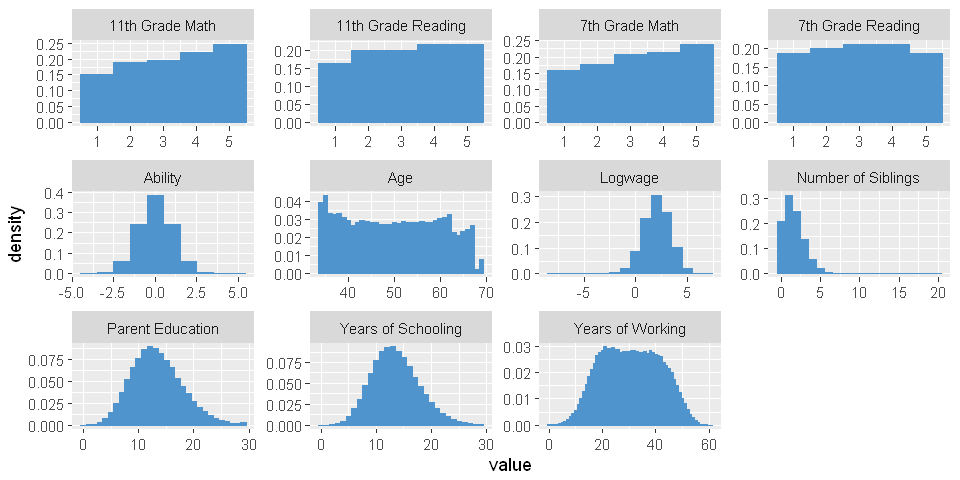

In [4]:
population_names <- population
colnames(population_names) <- c('Logwage', 'Ability', '7th Grade Math', '11th Grade Math', '7th Grade Reading', '11th Grade Reading',
                                   'Parent Education', 'Years of Schooling', 'Number of Siblings', 'Years of Working', 'Age')
gathered_population <- gather(population_names)
ggplot((gathered_population), aes(x = value, y = ..density..) ) + geom_histogram(binwidth = 1, color = 'steelblue3', fill = "steelblue3" ) +  facet_wrap(~key, scales = 'free')

To increase the validity of the simulated data, I compared the first two simulated population moments with the imposed moments reported in Blundell et al. [(2005)](https://rss.onlinelibrary.wiley.com/doi/full/10.1111/j.1467-985X.2004.00360.x?casa_token=8XTSrhMvcoIAAAAA%3Ar0ZECHQIWsbtdynj4kZZ_R_-HSDkUKPlkLvS8GF9whkNF584aPmn6nHGR4cZXOOZTVLQQu_-9E8VunWZ). All variables have means that are close to the imposed means. The variances deviate of around $13\%$ to $14\%$ for schooling, number of siblings and the logarithmic wage. However, since these numbers are small in magnitude, I see this as reasonable population moments for the upcoming principal component analysis.  

# 4.2 Variance of the Principal Component Regression Coefficients in a Simulation Study
---

In [5]:
sample_size <- c(50,80,100,150, seq(200, 5000, by = 200)) #decide on which sample sizes should be analyzed; sample sizes < 50 can lead to computationally singular Z'Z matrices
set.seed(12345) #set seet to ensure reporducibility
population_Y <- cbind(population$logwage, X) #create matrix including the log-wages
M <- ncol(X) # do it for all since it does not change the other
numb_it <- 400 #define number of iterations to compute the mean of the variances

#use the lapply function to create the variances for each coefficient and sample size. Since this takes around one day, I chose to pre-simulate the data and load it. For wuick simulation choose less samples.
#print_it = TRUE enables displaying the current iterations
load("SimData/var_9M.Rda") #load the stored results from the folder 'SimData' 
#variance_analysis_results <- lapply(sample_size, coef_var_analysis, population = population_Y, true_phi = phi, M = M, transform = trans, iterations = numb_it, numb_iterations = numb_it, print_it = FALSE) 

confidence <- 0.95 #set level of confidence for the confidence bands
type_CI <- 'quantile' #either 'mean' or 'quantile'
line <- 'mean' #either 'mean' or 'empirical'
#use the lapply function to prepare all the plots. computes means and confidence intervals of the means of the variances for all coefficients and all sample sizes
variance_plots_data_CI <- lapply(c(1:M), prepare_variances_plots_CI, list_variances = variance_analysis_results,
                                            sample_size = sample_size, confidence = confidence, type_CI = type_CI, line = line, numb_it = numb_it)
#set up plot to your taste
xlab <- 'Sample Size'
ylab <- 'Variance Estimate'
numb_columns <- 3 #number of columns per plot
col_prac_formula <- "orange"#orange/brown #colour of the mean of the variance estimates of the estimates obtained by formula 3.14
col_prac <- 'steelblue' #colour of the mean of the variance estimates of the estimates obtained by formula 3.13 using stochastic phis
col_theo_formula <- 'green'#green #colour of the mean of the variance estimates of the estimates obtained by formula 3.15
col_theo <- 'red' #colour of the mean of the variance estimates of the estimates obtained by formula 3.14 using the true phi shown above

Subsequent I derive a 3-step strategy to validate that $\widehat{\text{Var}(\hat{\beta^s})}^F_{n}$ and $\widehat{\text{Var}(\hat{\beta^t})}^F_{n}$ build reasonable quantities on how to decide if the variance of the principal component regression coefficients is larger if the true eigenvectors are unknown. 
   1. I compare $\widehat{\text{Var}(\hat{\beta^t})}^E_{n}$ and $\widehat{\text{Var}(\hat{\beta^t})}^F_{n}$ and derive that the simulated distribution of $\hat{\beta^t}$ yields the same variance estimates as simulating the analytically formula to estimate the variance. 
   2. I compare $\widehat{\text{Var}(\hat{\beta^s})}^E_{n}$ and $\widehat{\text{Var}(\hat{\beta^s})}^F_{n}$ and observe that the variance estimates using the simulated distribution are for most parameters significantly higher and for some parameters equal as the estimates obtained by simulating the analytically formula. 
   3. I compare $\widehat{\text{Var}(\hat{\beta^s})}^F_{n}$ and $\widehat{\text{Var}(\hat{\beta^t})}^F_{n}$ and find the there is no remarkable difference in the variances.
   
I have chosen sample sizes of $n = 50, 80, 100, 150, 200, 400, 600, 800, \dots, 5000$ to check the validity of the results in small and large samples. I chose $I$, the number of iterations, to be 400, which seemed large enough to build the simulated distributions of the moments given in the stated formulas. To ensure robustness of my results I have simulated the variances 400 times for each sample size.

# 4.2.1 Compare the Variances of the Theoretical Case using Simulated Distributions and the Simulated Algebraically Derived Formula
---
I plot the mean of the simulated variances per sample size and the simulated quantiles of the variances (transparent areas), even though the latter cannot be seen in most cases, since they are too small, as a function of the corresponding sample sizes. 
As theory suggests, the variances increase in an ascending order of the beta coefficients. The means of the variances and the simulated quantiles of the variances nearly coincide and thus I conclude that there is no remarkable difference. Hence, the simulated analytically derived formulas are reasonable estimates of the true variance and therefore it seems reasonable to use $\widehat{\text{Var}(\hat{\beta^t})}^F_{n}$ and $\widehat{\text{Var}(\hat{\beta^s})}^F_{n}$ rather than the variances obtained by simulated distributions, if the variance derived from the simulated distribution $\widehat{\text{Var}(\hat{\beta^s})}^E_{n}$ is greater than $\widehat{\text{Var}(\hat{\beta^s})}^F_{n}$. I show that this is the case in the next subsection.

**Figure 3 - Variances of Regression Coefficients Using the Theoretical Matrix of Eigenvectors Computed by Analytical Formula and Simulated Distribution**

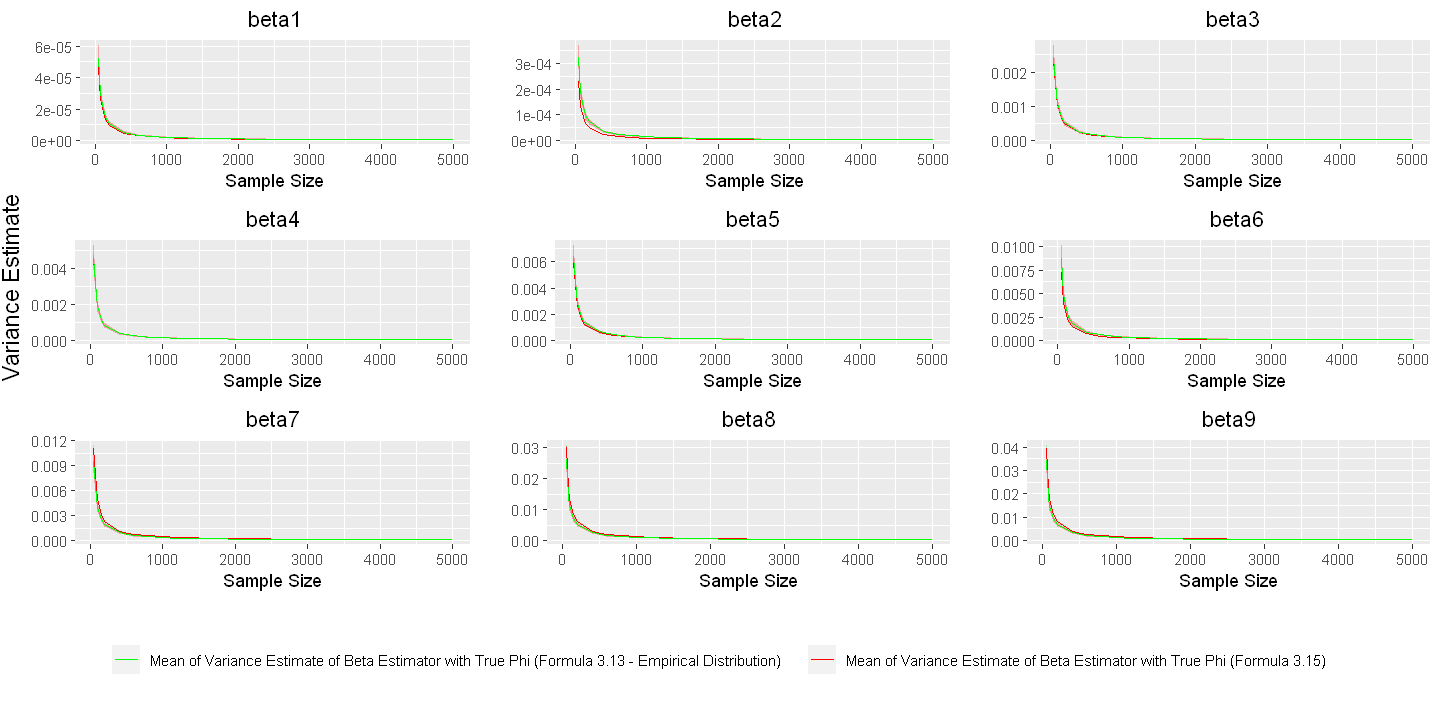

In [28]:
options(repr.plot.width=12, repr.plot.height=6) #adjust plot size
plots_variance_CI(variance_plots_data = variance_plots_data_CI, first_method = 'beta_theo_formula', second_method = 'beta_theo',
                  colour_1 = col_theo_formula, colour_2 = col_theo, xlab_string = xlab, ylab_string = ylab,
                  legend_df1 = 'Mean of Variance Estimate of Beta Estimator with True Phi (Formula 3.15)',
                  legend_df2 = 'Mean of Variance Estimate of Beta Estimator with True Phi (Formula 3.13 - Empirical Distribution)',
                  numb_columns = numb_columns, sample_size = sample_size, subtitle = 'beta')

# 4.2.2 Compare the Variances of the Empirical Case using Simulated Distributions and the Simulated Algebraically Derived Formula
---
Again, I plot the mean of the simulated variances per sample size and the simulated quantiles of the variances (transparent areas), as a function of the corresponding sample sizes. Contrarily to the non-stochastic case, the variances computed with the simulated analytical formula are all lower or at least equal to the variances obtained from simulating the distribution of the variances and thus can serve as an lower bound.

**Figure 4 - Variances of Regression Coefficients Using the Stochastic Matrix of Eigenvectors Computed by Analytical Formula and Simulated Distribution**

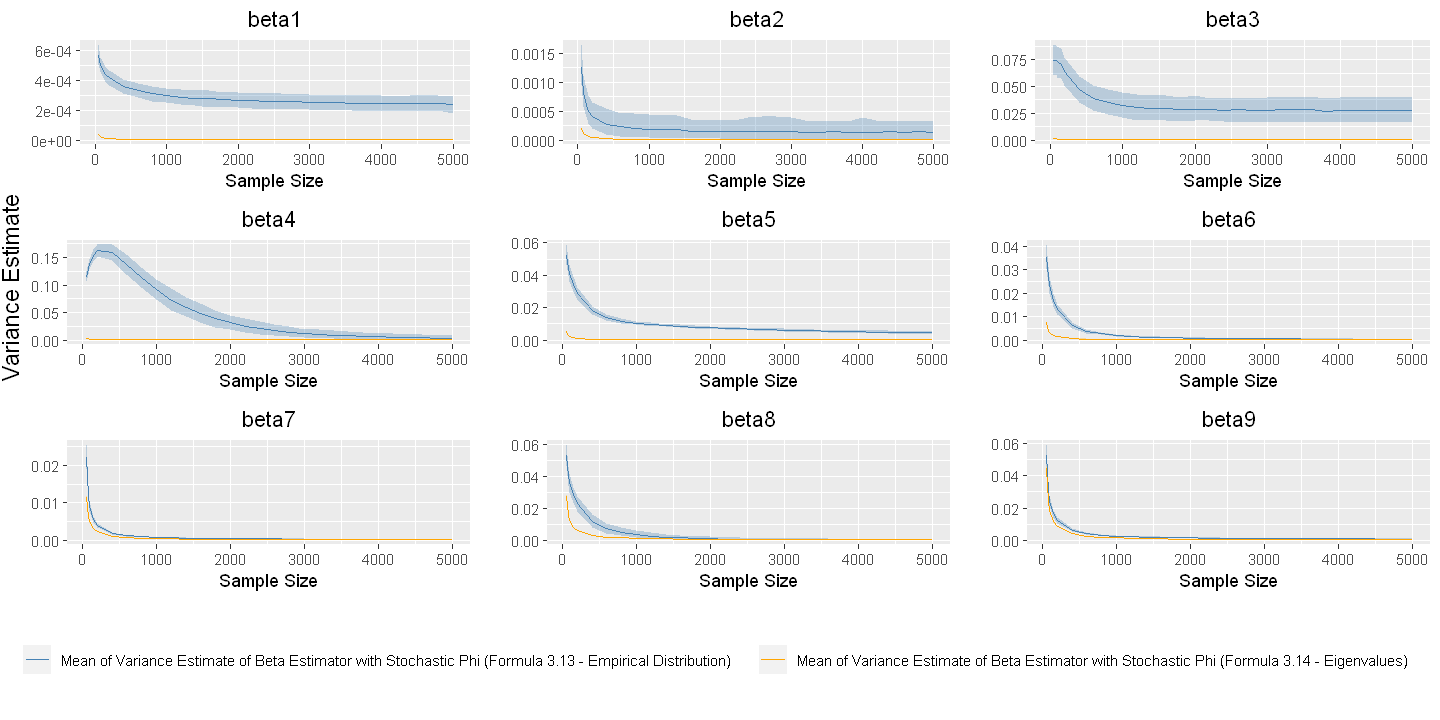

In [29]:
plots_variance_CI(variance_plots_data = variance_plots_data_CI, first_method = 'beta_prac', second_method = 'beta_prac_formula',
                  colour_1 = col_prac, colour_2 = col_prac_formula, xlab_string = xlab, ylab_string = ylab,
                  legend_df2 = 'Mean of Variance Estimate of Beta Estimator with Stochastic Phi (Formula 3.14 - Eigenvalues)',
                  legend_df1 = 'Mean of Variance Estimate of Beta Estimator with Stochastic Phi (Formula 3.13 - Empirical Distribution)',
                  numb_columns = numb_columns, sample_size = sample_size, subtitle = 'beta')

From the findings I conclude that using the results of the simulated distribution can lead to misleading results when the variance of the coefficients should be compared. Summed up I conclude that $\widehat{\text{Var}(\hat{\beta^s})}^F_{n}$ and $\widehat{\text{Var}(\hat{\beta^t})}^F_{n}$ should be used to compare the variances, which is done subsequent.

# 4.2.3 Compare the Variances of the Empirical and the Theoretical Coefficient Estimates
---
The means and the quantiles of the variances $\widehat{\text{Var}(\hat{\beta^t})}^F_{n}$ and $\widehat{\text{Var}(\hat{\beta^s})}^F_{n}$ are basically the same for nearly any sample size. For some parameters in small samples ($n = 50, 80$) it is even the case that $\hat{\beta^t}$ has a greater mean of the variances and its quantiles are higher.

**Figure 5 - Variances of Regression Coefficients Using the Stochastic Matrix of Eigenvectors vs. the Theoretical Matrix of Eigenvectors**

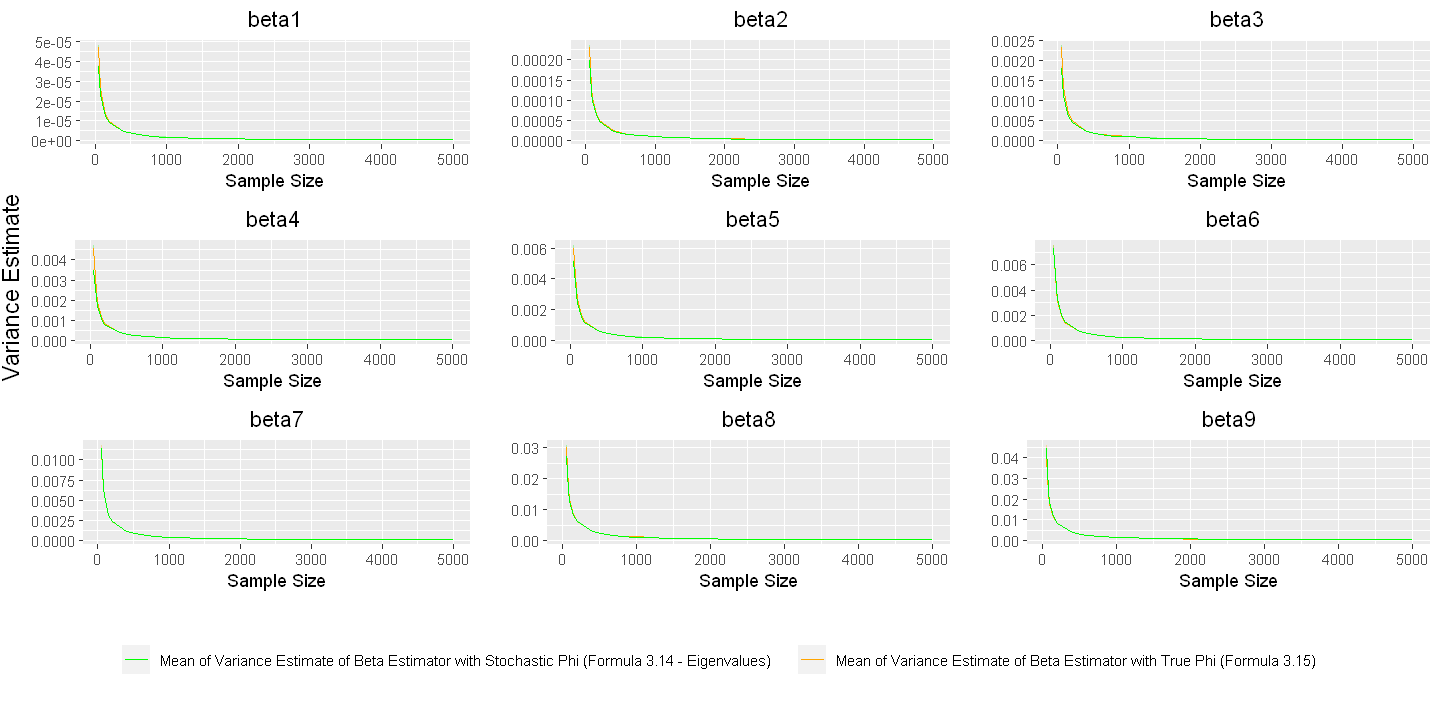

In [30]:
plots_variance_CI(variance_plots_data = variance_plots_data_CI, first_method = 'beta_theo_formula', second_method = 'beta_prac_formula',
                  colour_1 = col_theo_formula, colour_2 = col_prac_formula, xlab_string = xlab, ylab_string = ylab,
                  legend_df1 = 'Mean of Variance Estimate of Beta Estimator with True Phi (Formula 3.15)',
                  legend_df2 = 'Mean of Variance Estimate of Beta Estimator with Stochastic Phi (Formula 3.14 - Eigenvalues)',
                  numb_columns = numb_columns, sample_size = sample_size, subtitle = 'beta')

From here I conclude that there is no increase of the variances of the principal component regression coefficients when either the true matrix of eigenvectors $\pmb \phi$ or the estimated $\hat{\pmb \phi}$ matrix is used. This finding should imply that the variances of $\hat{Y^s}$ and $\hat{Y^t}$ do not differ as well. This is examined and confirmed subsequent.

# 4.3 Variance of Estimated Outcomes
---

In [7]:
variances_Y_prac <- prepare_Y_variances(meth_interest = 'variances_Y_prac', list_variances = variance_analysis_results, confidence = confidence,
                                        type_CI = type_CI, line = line, numb_it = numb_it) #compute means and confidence intervals
variances_Y_theo <- prepare_Y_variances(meth_interest = 'variances_Y_theo', list_variances = variance_analysis_results, confidence = confidence,
                                        type_CI = type_CI, line = line, numb_it = numb_it) #compute means and confidence intervals
list_var_Y <- list(list('prac' = variances_Y_prac, 'theo' = variances_Y_theo)) #save all in one list that can be applied to the plots_variance_CI function

Since $\hat{Y^s}$ is invariant to the choice of the eigenvectors and $\hat{Y^t}$ is invariant since its representative is chosen prior to the regressions, I use the simulated distributions of the random variables to derive the unconditional variances. As expected from the previous subsection there is no difference in the variance of $\hat{Y^s}$ and $\hat{Y^t}$.

**Figure 6 - Variances of Wage Estimates Using the Stochastic Matrix of Eigenvectors vs. the Theoretical Matrix of Eigenvectors**

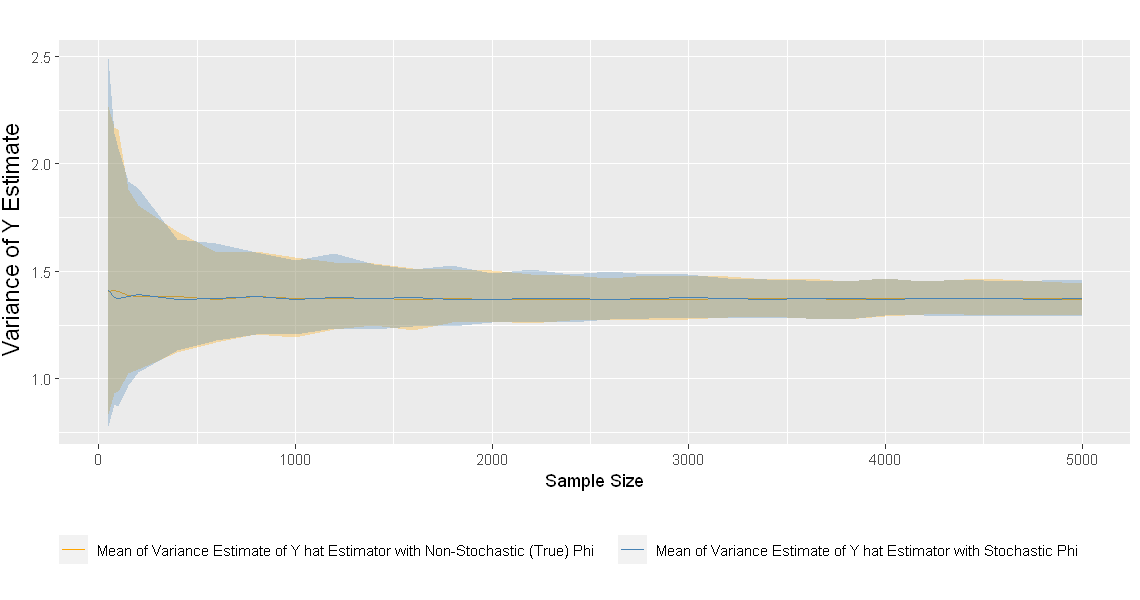

In [8]:
options(repr.plot.width=9.5, repr.plot.height=5) #adjust plot size
plots_variance_CI(variance_plots_data = list_var_Y, first_method = 'theo', second_method = 'prac',
                  colour_1 = 'orange', colour_2 = 'steelblue', xlab_string = 'Sample Size', ylab_string = 'Variance of Y Estimate',
                  legend_df1 = 'Mean of Variance Estimate of Y hat Estimator with Non-Stochastic (True) Phi',
                  legend_df2 = 'Mean of Variance Estimate of Y hat Estimator with Stochastic Phi',
                  numb_columns = 1, sample_size = sample_size, subtitle = 'Y', make_subtitle = FALSE)

# 5. Conclusion
---
I have used a data generating process, that builds on various assumptions, is able to reflect given first and second moments, to build a data set that sets wages in dependence of other socioeconomic factors and to yield realistic dependence structures. I used this data to examine how the variance of the principal component regression coefficients and the variance of the estimated wages differ, if the principal components are unknown and must be estimated with the empirical observations. I did so by algebraically deriving necessary conditions on how the estimates of the variances can be obtained in a simulation study. In particular I find that simulating the distribution is feasible for the estimated outcome but infeasible for the coefficients, which must be simulated by using an algebraic representation of the variance. I validate that this algebraically derived procedures can be applied in the simulation study. The final results yield that the variances of all estimated coefficients and of the estimated wages, computed using the estimated principal components, are not substantial different to the variances obtained using the theoretical principal components. Thus, I find that there is no considerable loss of accuracy using the estimated variance covariance matrix estimating counter factual outcomes. \
For further analysis it is desirable to study whether the results change, if only a subset of all principal components is used. Even though this would not change the variances using the estimated principal components, the variances using the theoretical principal components could change. Moreover, it would be interesting to see in a simulation study how fast the eigenvalues of the estimated variance covariance matrix converge to the true eigenvalues and if there is convergence of the absolute values of the eigenvectors. \
Additionally, it might be desirable to increase the number of regressors to see how the variance behaves in high-dimensional cases and if the derived theory can help to perform dimension reduction.


# References
---

> Bailey, M. J. (2010). " Momma's got the pill": how Anthony Comstock and Griswold v. Connecticut shaped US childbearing. American economic review, 100(1), 98-129. [Link](https://www.aeaweb.org/articles?id=10.1257/aer.100.1.98)

> Björklund, A., & Kjellström, C. (2002). Estimating the return to investments in education: how useful is the standard Mincer equation?. Economics of Education Review, 21(3), 195-210. [Link](https://www.sciencedirect.com/science/article/abs/pii/S0272775701000036)

> Blundell, R., Dearden, L., & Sianesi, B. (2005). Evaluating the effect of education on earnings: models, methods and results from the National Child Development Survey. Journal of the Royal Statistical Society: Series A (Statistics in Society), 168(3), 473-512. [Link](https://rss.onlinelibrary.wiley.com/doi/full/10.1111/j.1467-985X.2004.00360.x?casa_token=8XTSrhMvcoIAAAAA%3Ar0ZECHQIWsbtdynj4kZZ_R_-HSDkUKPlkLvS8GF9whkNF584aPmn6nHGR4cZXOOZTVLQQu_-9E8VunWZ)

> Blundell, R., Costa Dias, M., Meghir, C., & Shaw, J. (2016). Female labor supply, human capital, and welfare reform. Econometrica, 84(5), 1705-1753. [Link](https://onlinelibrary.wiley.com/doi/abs/10.3982/ECTA11576?casa_token=T7_8JfSc3V0AAAAA:Rq3dQoE4CwRQ5bmOvmvwz1RfUnzp7wYh3LRtrMZsrJjKhrefbBItL0gdFcdZLiYVB-33AUya90S8wTfy)

> Blundell, R., Pistaferri, L., & Saporta-Eksten, I. (2016). Consumption inequality and family labor supply. American Economic Review, 106(2), 387-435. [Link](https://www.aeaweb.org/articles?id=10.1257/aer.20121549)

> British Government. School Starting Age. visited at 10.08.2020 at 19.07. [Link](https://www.gov.uk/schools-admissions/school-starting-age)

> British Government. School Leaving Age. visited at 10.08.2020 at 19.17. [Link](https://www.gov.uk/know-when-you-can-leave-school)

> British Government. State Pension Age. visited at 10.08.2020 at 18.13. [Link](https://www.gov.uk/state-pension-age)

> Card, D. (2001). Estimating the return to schooling: Progress on some persistent econometric problems. Econometrica, 69(5), 1127-1160. [Link](https://onlinelibrary.wiley.com/doi/full/10.1111/1468-0262.00237?casa_token=Fb2oj5pOnrsAAAAA%3AQmDyCEKfwLAsw9z4b1JZgjqWnCgpYw0n49-ljsiGMyx1va5NnTVvAdUL_U907RhsL_EtJ10m3V2iDdfV)

> Carneiro, P., Heckman, J. J., & Vytlacil, E. J. (2011). Estimating marginal returns to education. American Economic Review, 101(6), 2754-81. [Link](https://www.aeaweb.org/articles?id=10.1257/aer.101.6.2754)

> Cygan-Rehm, K., & Maeder, M. (2013). The effect of education on fertility: Evidence from a compulsory schooling reform. Labour Economics, 25, 35-48. [Link](https://www.sciencedirect.com/science/article/abs/pii/S0927537113000584)

> Consul, P. C., & Jain, G. C. (1973). A generalization of the Poisson distribution. Technometrics, 15(4), 791-799. [Link](https://www.tandfonline.com/doi/abs/10.1080/00401706.1973.10489112)

> Davis-Kean, P. E. (2005). The influence of parent education and family income on child achievement: the indirect role of parental expectations and the home environment. Journal of family psychology, 19(2), 294. [Link](https://psycnet.apa.org/buy/2005-06518-016)

> Fan, X., Seshadri, A., & Taber, C. (2015). Estimation of a life-cycle model with human capital, labor supply and retirement. Australia. University of New South Wales. [Link](https://www.ssc.wisc.edu/~aseshadr/WorkingPapers/FST.pdf)

> Friedman, J., Hastie, T., & Tibshirani, R. (2001). The elements of statistical learning (Vol. 1, No. 10). New York: Springer series in statistics. [Link](https://psycnet.apa.org/buy/2005-06518-016)

> Hansen, K. T., Heckman, J. J., & Mullen, K. J. (2004). The effect of schooling and ability on achievement test scores. Journal of econometrics, 121(1-2), 39-98. [Link](https://www.sciencedirect.com/science/article/abs/pii/S0304407603002598)

> Heckman, J. J., Lochner, L. J., & Todd, P. E. (2006). Earnings functions, rates of return and treatment effects: The Mincer equation and beyond. Handbook of the Economics of Education, 1, 307-458. [Link](https://www.sciencedirect.com/science/article/pii/S1574069206010075)

> Holmlund, B., Liu, Q., & Nordström Skans, O. (2008). Mind the gap? Estimating the effects of postponing higher education. Oxford Economic Papers, 60(4), 683-710. [Link](https://academic.oup.com/oep/article-abstract/60/4/683/2362081)

> Human Development Report (2020). United Nations Development Programme. [Link](http://hdr.undp.org/en/indicators/103006)

> James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning (Vol. 112, p. 18). New York: springer. [Link](https://link.springer.com/book/10.1007%2F978-1-4614-7138-7)

> Jolliffe, I. T. (1986). Principal components in regression analysis. In Principal component analysis (pp. 129-155). Springer, New York, NY. [Link](https://link.springer.com/chapter/10.1007/978-1-4757-1904-8_8)

> Jung, R. C., & Tremayne, A. R. (2011). Convolution‐closed models for count time series with applications. Journal of Time Series Analysis, 32(3), 268-280. [Link](https://onlinelibrary.wiley.com/doi/full/10.1111/j.1467-9892.2010.00697.x?casa_token=Z_aij9JL6U0AAAAA%3APnfZIk7h3P8Jzs4pVvW-Hmd1mswaOAMW-5KbW6G6YV3uEQiXvbrT7ZH8pGHJqiSed7ofNfkwSbgb2hfx)

> Lemieux, T. (2006). The “Mincer equation” thirty years after schooling, experience, and earnings. In Jacob Mincer a pioneer of modern labor economics (pp. 127-145). Springer, Boston, MA. [Link](https://link.springer.com/chapter/10.1007/0-387-29175-X_11)

> Mincer, J. (1974). Schooling, Experience, and Earnings. Human Behavior & Social Institutions No. 2. [Link](https://eric.ed.gov/?id=ED103621)

> Ku, W., Storer, R. H., & Georgakis, C. (1995). Disturbance detection and isolation by dynamic principal component analysis. Chemometrics and intelligent laboratory systems, 30(1), 179-196. [Link](https://www.sciencedirect.com/science/article/pii/0169743995000763)

> Office for National Statistics. Population Estimates. visited at 10.08.2020 at 19.02. [Link](https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/populationestimatesforukenglandandwalesscotlandandnorthernireland/mid2015/ukandregionalpopulationestimates18382015.zip)

> Shlens, J. (2014). A tutorial on principal component analysis. arXiv preprint arXiv:1404.1100. [Link](https://www.cs.cmu.edu/~elaw/papers/pca.pdf)

> Willis, R. J. (1973). A new approach to the economic theory of fertility behavior. Journal of political Economy, 81(2, Part 2), S14-S64. [Link](https://www.journals.uchicago.edu/doi/abs/10.1086/260152?journalCode=jpe)
